<a href="https://colab.research.google.com/github/PreciousAkpokighe/Churn-Prediction-Platform-Capstone-Design/blob/main/Self_study_try_it_activity_5_1_Applying_probabilistic_approaches_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-study try-it activity 5.1: Applying probabilistic approaches in ML

There are different approaches to probability in ML.

In this activity, you will focus on the following:

- Frequentist approach

- Maximum likelihood estimation

- Bayesian approach

- Laplace's rule of succession

In [1]:
import numpy as np
from math import comb
from scipy.stats import binom
import matplotlib.pyplot as plt

## Frequentist approach

The frequentist approach to statistics interprets probability as the long-run frequency of events in repeated experiments. It focuses on making inferences based solely on observed data, without incorporating prior beliefs or subjective probabilities. Key methods include hypothesis testing, confidence intervals and parameter estimation.

The key expression in the frequentist approach is the likelihood function:

$$
L(\theta; x) = P(x \mid \theta)
$$





### **Question 1**:
You throw a coin five times and obtain five heads ($X_1 = 1, \ X_2 = 1, \ldots, X_5 = 1$). What is $\theta := \mathbb{P}[\text{heads}]$?

Fill in the ellipses with appropriate values.

**Answer**

In [2]:
s = ... #Number of successes
n = ... #Number of trials
theta_hat = ... #Number of successes 's' divided by number of trials 'n'
print(theta_hat)

Ellipsis


### **Question 2**:

If the truth is $\theta = 0.9$, what is the probability that you will see five heads in a row? Interpret the result.

HINT: The probability of heads = $\theta^s$, where *s* is the number of heads. Fill in the ellipses with appropriate values.


#### Answer

In [4]:
#Define the true probability of heads
theta = 0.9

#Number of consecutive heads required
n_heads = 5

#Calculate the probability of observing five heads in a row
prob_5_heads = theta**n_heads

#Print the result
print(f"True probability of heads (θ): {theta}")
print(f"Probability of observing {n_heads} consecutive heads: {prob_5_heads:.5f}")

True probability of heads (θ): 0.9
Probability of observing 5 consecutive heads: 0.59049


## Maximum likelihood estimation

Goal: Find the parameter 𝜃 (e.g. the probability of heads for a coin) that maximises the likelihood of observing the data you have.)


Given:
$X_1 = 1, X_2 = 1, \ldots, X_5 = 1$, which means all five coin tosses resulted in heads.



You have: $$L(x; \theta) = p(X_1 = 1, \ X_2 = 1, \ldots, X_5 = 1 | \theta) = \prod \theta^5  $$
Hence, the $\theta$ that maximises the likelihood is $\theta = 1$.

### **Question 3:**
For a coin with $\mathbb{P}[\text{head}] = \theta$, what is the probability of having $s$ heads out of $n$ (independent) flips? (Recall the binomial distribution.) Compute this value for $n=10$, $s = 3$, $\theta = 0.6$.

#### Answer
$ \mathbb{P}[\sum_{i=1}^n X_i] = \displaystyle{n \choose{s}} \theta^s (1- \theta)^{n-s} $

HINT: For the mathematical formula that uses combinations, use the `comb(n,s)` function.

Fill in the ellipses to compute the likelihood.

In [6]:
#Computed using the manual function of the binomial formula
n = 10
s = 3
theta = 0.6
likelihood = comb(n, s) * (theta**s) * ((1 - theta)**(n - s))
print(round(likelihood,4))

0.0425


In [7]:
#Computed using the inbuilt SciPy function
round(binom.pmf(s, n, theta),4)

np.float64(0.0425)

## Bayesian approach
Given that you have $s$ heads in total, out of $n$ flips, you would like to find a probability distribution for $\theta \in [0,1]$, denoted $f(\theta)$.

The major philosophy is to assume that $f(\theta)$ is proportional to the likelihood of data under $\theta$; that is, if a $\theta$ value obtains a likelihood that is greater than or equal to the likelihood of $\theta'$, then $f(\theta)$ should be greater than or equal to $f(\theta)$. You should thus have:
$$f(\theta) \propto  \displaystyle{n \choose{s}} \theta^s (1- \theta)^{n-s}$$
where $\propto$ denotes 'proportional to', so there exists some constant $C$ that does not depend on $\theta$ so that:
$$f(\theta)  =  \displaystyle C \cdot {n \choose{s}} \theta^s (1- \theta)^{n-s}$$

Simplifying this using basic linear algebra, the value of $f(\theta)$ is given by:
$$f(\theta) = (n+1) {n \choose s} \theta^s (1-\theta)^{n-s}$$

**Plotting $f(\theta)$ for the sequences:**
- Three heads out of three flips
- Five heads out of five flips
- Nine heads out of ten flips
- Two heads out of ten flips

In [8]:
def density_theta(n,s, theta):
    return (n+1)*comb(n,s)*(theta**s)*((1-theta)**(n-s))

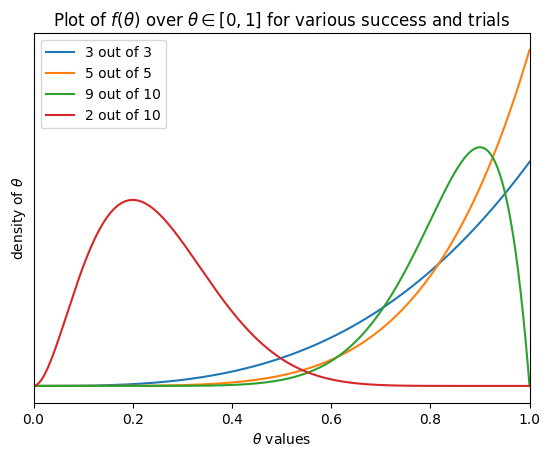

In [9]:
divide = 1000

thetas = np.linspace(0, 1, divide)

#1
C1 = np.array(list(map(density_theta,3*np.ones(divide).astype(int),3*np.ones(divide).astype(int), thetas)))

#2
C2 = np.array(list(map(density_theta,5*np.ones(divide).astype(int),5*np.ones(divide).astype(int), thetas)))

#3
C3 = np.array(list(map(density_theta,10*np.ones(divide).astype(int),9*np.ones(divide).astype(int), thetas)))

#4
C4 = np.array(list(map(density_theta,10*np.ones(divide).astype(int),2*np.ones(divide).astype(int), thetas)))


plt.plot(thetas, C1, label='3 out of 3')
plt.plot(thetas, C2, label='5 out of 5')
plt.plot(thetas, C3, label='9 out of 10')
plt.plot(thetas, C4, label='2 out of 10')
plt.yticks([])

plt.xlabel(r'$\theta$ values')
plt.ylabel(r'density of $\theta$')
plt.title(r"Plot of $f(\theta)$ over $\theta \in [0,1]$ for various success and trials")
plt.yticks()
plt.xlim([0,1])
plt.legend()
plt.show()

Given $f(\theta)$ as you derived above, if you see $s$ heads out of $n$ trials, what is the probability that you will have a head in the next ($n+1$-th) flip? By the law of total probability, you have:
\begin{align}\mathbb{P}[\text{Head on $n+1$-th flip} \ | \ \text{$s$ heads out of $n$ flips previously}] & =  
\int_{x \in [0,1]} \mathbb{P}[\text{Heads} \ | \ \theta] \cdot f(\theta) \mathrm{d} \theta \\
& = \int_{x \in [0,1]} \theta \cdot f(\theta) \mathrm{d} \theta \\
& = \mathbb{E}[\theta] = \color{red}{\dfrac{s+1}{n+2}}
\end{align}

## Laplace's rule of succession

In the end, you replaced the expectation of $\theta$ directly. However, though relatively simple, this substitution is not immediate.

In the integration step, you first substitute the expression for $f(\theta)$ as follows:
\begin{align}
\int_{x \in [0,1]} \theta \cdot f(\theta) \mathrm{d} \theta  = \int_{x \in [0,1]} \theta \cdot (n+1) {n \choose s} \theta^s (1-\theta)^{n-s} \mathrm{d} \theta
\end{align}

Taking the constants outside the integral gives:
\begin{align}
(n+1) {n \choose s}  \int_{x \in [0,1]} \theta^{s+1} (1-\theta)^{n-s} \mathrm{d} \theta
\end{align}

Using the Euler's function as discussed earlier, you have $\int_{x \in [0,1]} \theta^{s+1} (1-\theta)^{n-s} \mathrm{d} \theta = \dfrac{(s+1)!(n-s)!}{(n+2)!}$; hence the above integration is:
\begin{align}
(n+1) {n \choose s}  \dfrac{(s+1)!(n-s)!}{(n+2)!}
\end{align}

Substituting this result, the integral becomes:
\begin{align}
& (n+1) {n \choose s}  \dfrac{(s+1)!(n-s)!}{(n+2)!}\\
= & \color{orange}{(n+1)} \dfrac{\color{red}{n!}}{\color{blue}{(n-s)!} s!}  \dfrac{(s+1)!\color{blue}{(n-s)!}}{(n+2)\color{orange}{(n+1)}\color{red}{n!}} \\
= & \dfrac{(s+1)!}{s! (n+2)} \\
= & \dfrac{s+1}{n+2}
\end{align}

#### **Discussion**
The final equation $\mathbb{E}[\theta] =\dfrac{s+1}{n+2}$ is called *Laplace's rule of succession*. Here, the estimation of the true $\theta$, when you have $s$ successes out of $n$ trials, is given as $(s+1)/(n+2)$. Discuss how this is similar or different from the MLE or unbiased estimation of $\theta$

#### Answer:

Fill in your views here.

#### **Question 4:**
If you were Laplace, what would your answer be to the following question:
- What is the probability that the sun will rise tomorrow?

#### Answer:

Fill in your answer here.

In [10]:
# Number of observed successful sunrises (e.g., days observed)
n = 1000000  # you can change this value

# Laplace's Rule of Succession
probability_sunrise = (n + 1) / (n + 2)

probability_sunrise

0.999999000002